## Zomato Data Analysis

Understanding customer preferences and restaurant trends is important for making informed business decisions in food industry. In this project, we will analyze Zomato's restaurant dataset to find meaningful insights. Questions such as

            Do more restaurants provide online delivery compared to offline services?
            Which type of restaurants are most favored by the public?
            What price range do couples prefer for dining out?
           

### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Creating the dataframe

In [39]:
zomato = pd.read_csv(r"C:\Users\pooja\OneDrive\Learning\Python Projects\Zomato Data Analysis\Zomato-data.csv")
zomato

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### Data Cleaning and Preparation

In [40]:
zomato['rate'] = zomato['rate'].str.strip().str.split('/').str[0]
zomato['rate'] = pd.to_numeric(zomato['rate'])
zomato

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


### Exploring Restaurant Types

Text(0.5, 0, 'Restaurant Types')

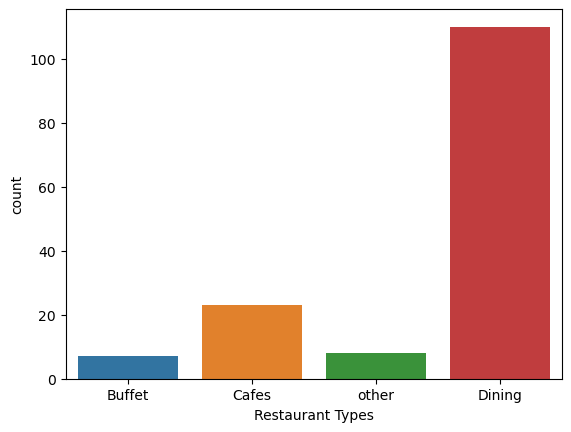

In [43]:
sns.countplot(x=zomato['listed_in(type)'])
plt.xlabel('Restaurant Types')

Text(0, 0.5, 'Votes')

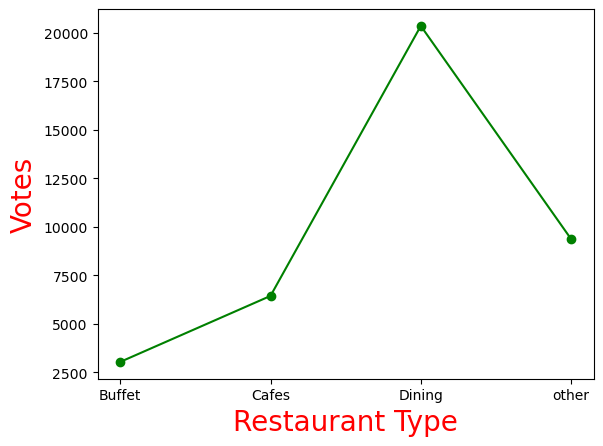

In [51]:
grouped_data = zomato.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Restaurant Type', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

### Identify the Most Voted Restaurant

In [55]:
max_votes = zomato['votes'].max()
restaurant_with_max_votes = zomato.loc[zomato['votes']==max_votes,'name']

print('Restaurant(s) with the maximum vote:', restaurant_with_max_votes)

Restaurant(s) with the maximum vote: 38    Empire Restaurant
Name: name, dtype: object


### Online Order Availability

<Axes: xlabel='online_order', ylabel='count'>

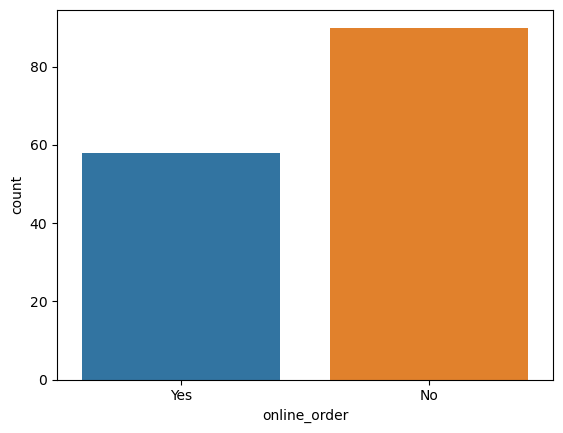

In [56]:
sns.countplot(x=zomato['online_order'])

### Appropriate Cost for Couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

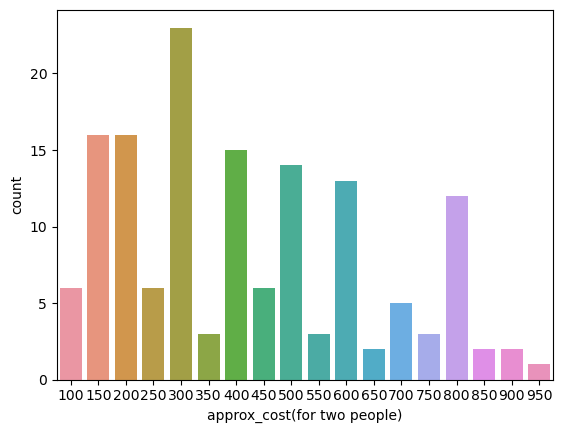

In [60]:
sns.countplot(x=zomato['approx_cost(for two people)'])

## Additional Analysis

### Analyze Ratings

Text(0.5, 1.0, 'Ratings Distribution')

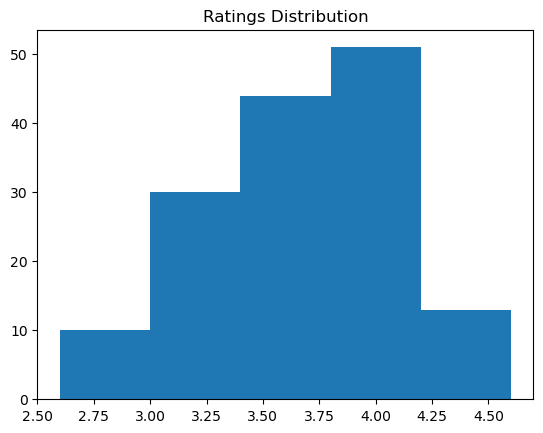

In [64]:
plt.hist(zomato['rate'],bins=5)
plt.title('Ratings Distribution')

### Ratings Comparison - Online vs Offline Orders

<Axes: xlabel='online_order', ylabel='rate'>

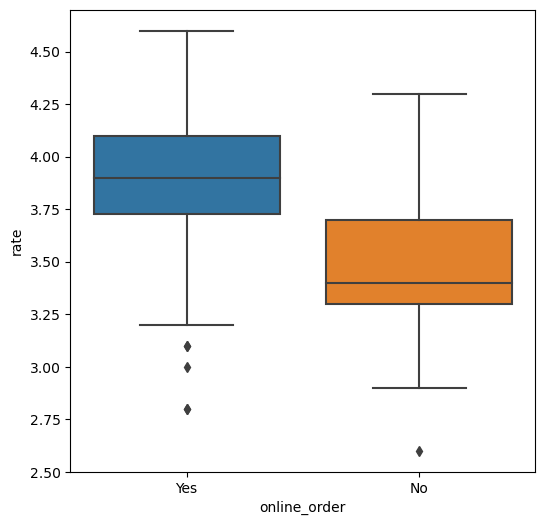

In [67]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data =zomato)